In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [183]:
main_df=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
main_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [184]:
main_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [185]:
main_df["total_bedrooms"]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [186]:
main_df['total_bedrooms']= main_df['total_bedrooms'].fillna(main_df['total_bedrooms'].mean())

In [187]:
main_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [188]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [189]:
train_dummmies=pd.get_dummies(train_df,drop_first=True,dtype=int)






In [190]:
train_dummmies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15480 entries, 19778 to 9982
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   15480 non-null  float64
 1   latitude                    15480 non-null  float64
 2   housing_median_age          15480 non-null  float64
 3   total_rooms                 15480 non-null  float64
 4   total_bedrooms              15480 non-null  float64
 5   population                  15480 non-null  float64
 6   households                  15480 non-null  float64
 7   median_income               15480 non-null  float64
 8   median_house_value          15480 non-null  float64
 9   ocean_proximity_INLAND      15480 non-null  int64  
 10  ocean_proximity_ISLAND      15480 non-null  int64  
 11  ocean_proximity_NEAR BAY    15480 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  15480 non-null  int64  
dtypes: float64(9), int64(4)
memory us

In [191]:
train_dummmies.corr()['median_house_value']

longitude                    -0.052181
latitude                     -0.139184
housing_median_age            0.117467
total_rooms                   0.127815
total_bedrooms                0.041692
population                   -0.029297
households                    0.060130
median_income                 0.691728
median_house_value            1.000000
ocean_proximity_INLAND       -0.483935
ocean_proximity_ISLAND        0.022113
ocean_proximity_NEAR BAY      0.163667
ocean_proximity_NEAR OCEAN    0.139509
Name: median_house_value, dtype: float64

<Axes: >

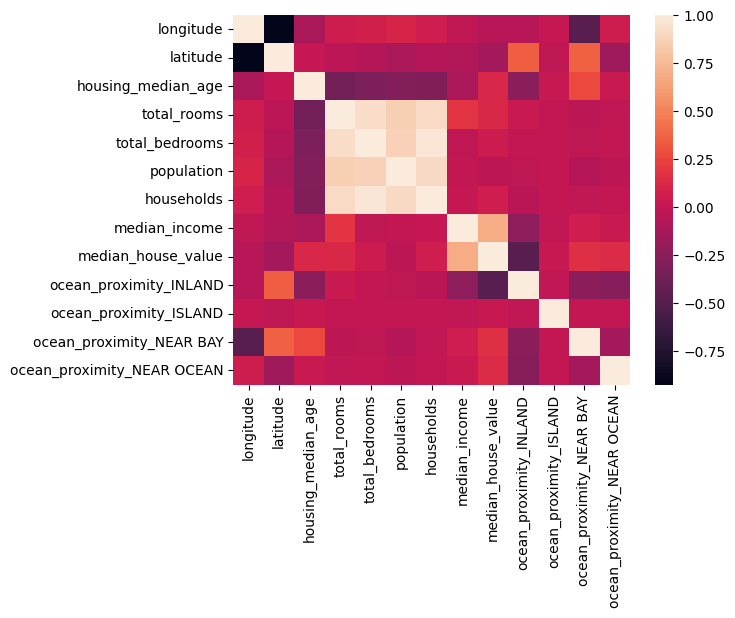

In [192]:
sns.heatmap(data=train_dummmies.corr())

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
train_df,test_df = train_test_split(main_df)

In [195]:
train_df.shape

(15480, 10)

In [196]:
test_df.shape

(5160, 10)

In [197]:
x_train=train_df.drop(columns=["median_house_value"])

In [198]:
y_train=train_df['median_house_value']

In [199]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18146,-122.03,37.35,16.0,1156.0,198.0,455.0,216.0,7.2779,<1H OCEAN
4052,-118.43,34.15,42.0,1293.0,214.0,459.0,217.0,7.6720,<1H OCEAN
12019,-117.51,33.95,12.0,9016.0,1486.0,4285.0,1457.0,4.9984,INLAND
14916,-117.04,32.63,26.0,2074.0,356.0,1228.0,335.0,4.1154,NEAR OCEAN
2692,-115.32,32.82,34.0,591.0,139.0,327.0,89.0,3.6528,INLAND
...,...,...,...,...,...,...,...,...,...
15244,-117.26,33.00,31.0,2695.0,491.0,1059.0,451.0,4.7841,NEAR OCEAN
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,<1H OCEAN
984,-121.87,37.66,27.0,1569.0,242.0,583.0,214.0,5.7519,INLAND
4804,-118.37,34.03,43.0,1350.0,287.0,811.0,307.0,3.3636,<1H OCEAN


In [200]:
x_train_dummies=pd.get_dummies(x_train,drop_first=True).reset_index()

In [201]:
x_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       15480 non-null  int64  
 1   longitude                   15480 non-null  float64
 2   latitude                    15480 non-null  float64
 3   housing_median_age          15480 non-null  float64
 4   total_rooms                 15480 non-null  float64
 5   total_bedrooms              15480 non-null  float64
 6   population                  15480 non-null  float64
 7   households                  15480 non-null  float64
 8   median_income               15480 non-null  float64
 9   ocean_proximity_INLAND      15480 non-null  bool   
 10  ocean_proximity_ISLAND      15480 non-null  bool   
 11  ocean_proximity_NEAR BAY    15480 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  15480 non-null  bool   
dtypes: bool(4), float64(8), int64(1

In [202]:
x_train_dummies=x_train_dummies.drop(columns="index")

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
linreq_model=LinearRegression()
linreq_model.fit(x_train_dummies,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [205]:
train_preds=linreq_model.predict(x_train_dummies)

Text(0.5, 0, 'prediction')

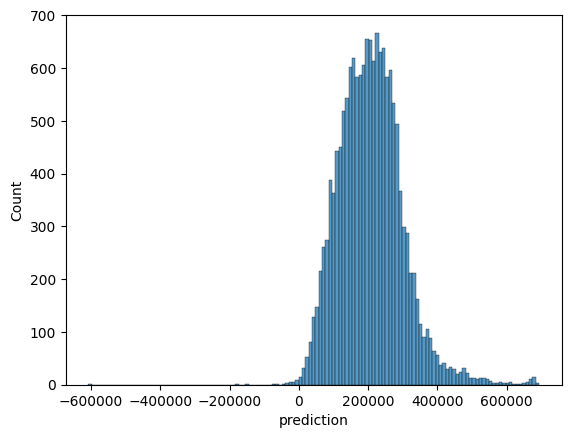

In [206]:
sns.histplot(data=train_preds)
plt.xlabel("prediction")

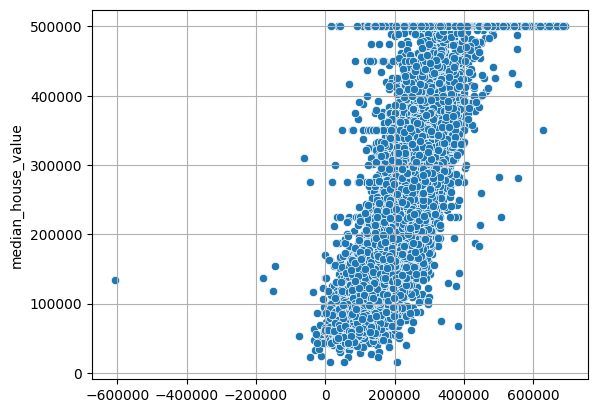

In [207]:
sns.scatterplot(x=train_preds,y=y_train)
plt.grid()

In [208]:
train_residual=train_preds-y_train

Text(0.5, 0, 'train error')

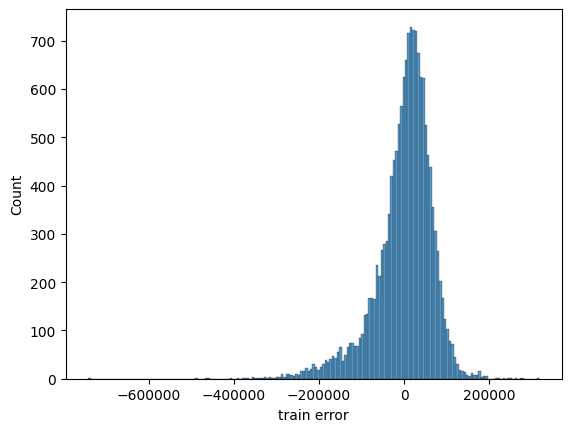

In [209]:
sns.histplot(data=train_residual)
plt.xlabel("train error")

Text(0.5, 0, 'train_residual')

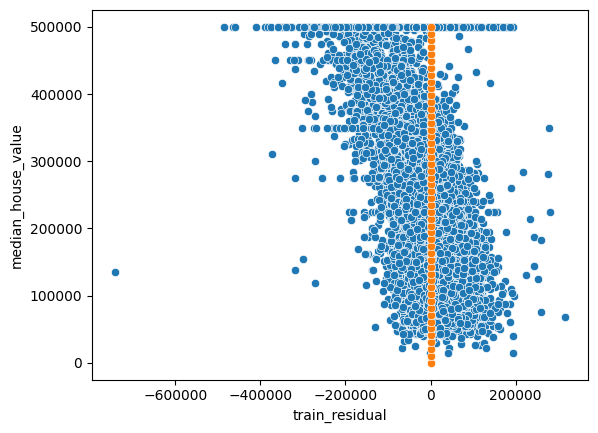

In [210]:
sns.scatterplot(x=train_residual,y=y_train)
sns.scatterplot(x=0,y=np.linspace(0,500000))
plt.xlabel("train_residual")

In [211]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [212]:
print("the train data")
print(f"mean_absolute_error : {mean_absolute_error(y_pred=train_preds,y_true=y_train)}")
print(f"mean_squared_error : {mean_squared_error(y_pred=train_preds,y_true=y_train)}")
print(f"root_mean_squared_error : {root_mean_squared_error(y_pred=train_preds,y_true=y_train)}")
print(f"r^2 score:{r2_score(y_pred=train_preds,y_true=y_train)}")

the train data
mean_absolute_error : 49629.709965564434
mean_squared_error : 4668188977.618577
root_mean_squared_error : 68324.14637314233
r^2 score:0.6513277330990455


Metrik/	                                            Mantığı/	                              Ne Zaman Kullanılır?	                           

/Örnek

MAE (Mean Absolute Error):	Tahminler ile gerçek değer arasındaki ortalama mutlak fark/	Genel hatayı görmek istediğinde/	Model ortalama olarak 10.000$ sapıyor mu?

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?
                                                                  
MSE (Mean Squared Error):    Farkları kareye alır → büyük hataları daha çok cezalandırır/   Büyük hataların ciddi problem olduğu durumlarda

Örnek

Çok pahalı evler varsa ve büyük hataları vurgulamak istiyorsan                     
	                                                    

Metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

RMSE (Root MSE):MSE’nin karekökü → hata birimi orijinal birimle olur/Hata birimini anlamak istediğinde/Ev fiyatı tahmininde $ olarak hata ölçmek istiyorsan

metrik	/                             Mantığı   /                                             Ne Zaman Kullanılır?

R² (Coefficient of Determination):Modelin verideki değişimi ne kadar açıkladığını gösterir/Modelin başarısını genel olarak görmek istediğinde
R² = 0.9 → model hedefi %90 oranında açıklıyor

In [213]:
pd.DataFrame(linreq_model.coef_,linreq_model.feature_names_in_).reset_index()

,index,0
0,longitude,-26595.513049
1,latitude,-25435.545575
2,housing_median_age,1090.463200
3,total_rooms,-5.626375
4,total_bedrooms,78.076781
5,population,-36.844003
6,households,68.847131
7,median_income,39288.916765
8,ocean_proximity_INLAND,-38065.197124
9,ocean_proximity_ISLAND,143791.829370


In [214]:
round(x_train_dummies.mean()*linreq_model.coef_)

longitude                     3180129.0
latitude                      -906342.0
housing_median_age              31176.0
total_rooms                    -14906.0
total_bedrooms                  42170.0
population                     -52755.0
households                      34529.0
median_income                  152688.0
ocean_proximity_INLAND         -12101.0
ocean_proximity_ISLAND             28.0
ocean_proximity_NEAR BAY         -217.0
ocean_proximity_NEAR OCEAN        571.0
dtype: float64

In [215]:
# test_df

In [216]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17760,-121.83,37.33,27.0,3127.0,610.0,3257.0,604.0,4.6333,173600.0,<1H OCEAN
8108,-118.19,33.80,38.0,2010.0,595.0,1535.0,525.0,1.9848,160400.0,NEAR OCEAN
11109,-117.90,33.85,32.0,1605.0,314.0,986.0,306.0,3.3375,186200.0,<1H OCEAN
17262,-119.71,34.42,52.0,1411.0,324.0,1091.0,306.0,4.1062,252900.0,<1H OCEAN
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,47500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10330,-117.76,33.83,15.0,3086.0,457.0,1262.0,436.0,6.4415,300700.0,<1H OCEAN
5525,-118.37,33.97,32.0,6699.0,1781.0,2725.0,1544.0,3.3889,285700.0,<1H OCEAN
17775,-121.86,37.36,31.0,1602.0,358.0,1179.0,354.0,4.4896,156800.0,<1H OCEAN
395,-122.34,37.88,37.0,3061.0,930.0,2556.0,924.0,1.7375,350000.0,NEAR BAY


In [217]:
test_dummies=pd.get_dummies(test_df,dtype=int,drop_first=True)

In [218]:
test_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17760,-121.83,37.33,27.0,3127.0,610.0,3257.0,604.0,4.6333,173600.0,0,0,0,0
8108,-118.19,33.80,38.0,2010.0,595.0,1535.0,525.0,1.9848,160400.0,0,0,0,1
11109,-117.90,33.85,32.0,1605.0,314.0,986.0,306.0,3.3375,186200.0,0,0,0,0
17262,-119.71,34.42,52.0,1411.0,324.0,1091.0,306.0,4.1062,252900.0,0,0,0,0
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,47500.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,-117.76,33.83,15.0,3086.0,457.0,1262.0,436.0,6.4415,300700.0,0,0,0,0
5525,-118.37,33.97,32.0,6699.0,1781.0,2725.0,1544.0,3.3889,285700.0,0,0,0,0
17775,-121.86,37.36,31.0,1602.0,358.0,1179.0,354.0,4.4896,156800.0,0,0,0,0
395,-122.34,37.88,37.0,3061.0,930.0,2556.0,924.0,1.7375,350000.0,0,0,1,0


In [219]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5160 entries, 17760 to 8571
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   5160 non-null   float64
 1   latitude                    5160 non-null   float64
 2   housing_median_age          5160 non-null   float64
 3   total_rooms                 5160 non-null   float64
 4   total_bedrooms              5160 non-null   float64
 5   population                  5160 non-null   float64
 6   households                  5160 non-null   float64
 7   median_income               5160 non-null   float64
 8   median_house_value          5160 non-null   float64
 9   ocean_proximity_INLAND      5160 non-null   int64  
 10  ocean_proximity_ISLAND      5160 non-null   int64  
 11  ocean_proximity_NEAR BAY    5160 non-null   int64  
 12  ocean_proximity_NEAR OCEAN  5160 non-null   int64  
dtypes: float64(9), int64(4)
memory usa

In [220]:
test_dummies.corr()['median_house_value']

longitude                    -0.052119
latitude                     -0.146018
housing_median_age            0.106846
total_rooms                   0.141157
total_bedrooms                0.063074
population                   -0.016605
households                    0.077062
median_income                 0.665644
median_house_value            1.000000
ocean_proximity_INLAND       -0.490866
ocean_proximity_ISLAND        0.028282
ocean_proximity_NEAR BAY      0.155565
ocean_proximity_NEAR OCEAN    0.163831
Name: median_house_value, dtype: float64

<Axes: >

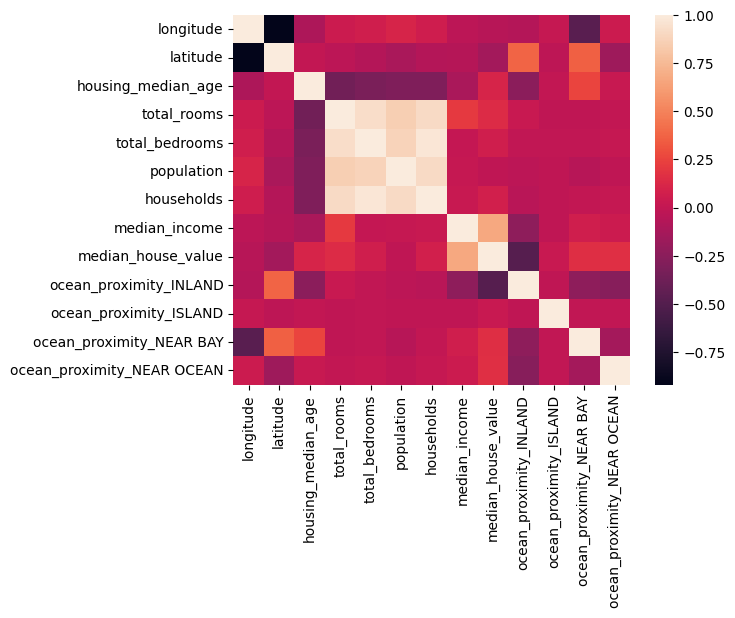

In [221]:
sns.heatmap(test_dummies.corr())

In [222]:
test_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17760,-121.83,37.33,27.0,3127.0,610.0,3257.0,604.0,4.6333,173600.0,0,0,0,0
8108,-118.19,33.80,38.0,2010.0,595.0,1535.0,525.0,1.9848,160400.0,0,0,0,1
11109,-117.90,33.85,32.0,1605.0,314.0,986.0,306.0,3.3375,186200.0,0,0,0,0
17262,-119.71,34.42,52.0,1411.0,324.0,1091.0,306.0,4.1062,252900.0,0,0,0,0
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,47500.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,-117.76,33.83,15.0,3086.0,457.0,1262.0,436.0,6.4415,300700.0,0,0,0,0
5525,-118.37,33.97,32.0,6699.0,1781.0,2725.0,1544.0,3.3889,285700.0,0,0,0,0
17775,-121.86,37.36,31.0,1602.0,358.0,1179.0,354.0,4.4896,156800.0,0,0,0,0
395,-122.34,37.88,37.0,3061.0,930.0,2556.0,924.0,1.7375,350000.0,0,0,1,0


In [223]:
x_test= test_df.copy()
y_test=test_df['median_house_value']

In [224]:
x_test_dummies=pd.get_dummies(x_test,dtype=int)

In [225]:
x_test_dummies = x_test_dummies.reindex(columns=x_train_dummies.columns, fill_value=0)

In [226]:
x_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5160 entries, 17760 to 8571
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   5160 non-null   float64
 1   latitude                    5160 non-null   float64
 2   housing_median_age          5160 non-null   float64
 3   total_rooms                 5160 non-null   float64
 4   total_bedrooms              5160 non-null   float64
 5   population                  5160 non-null   float64
 6   households                  5160 non-null   float64
 7   median_income               5160 non-null   float64
 8   ocean_proximity_INLAND      5160 non-null   int64  
 9   ocean_proximity_ISLAND      5160 non-null   int64  
 10  ocean_proximity_NEAR BAY    5160 non-null   int64  
 11  ocean_proximity_NEAR OCEAN  5160 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 524.1 KB


In [227]:
x_test_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17760,-121.83,37.33,27.0,3127.0,610.0,3257.0,604.0,4.6333,0,0,0,0
8108,-118.19,33.80,38.0,2010.0,595.0,1535.0,525.0,1.9848,0,0,0,1
11109,-117.90,33.85,32.0,1605.0,314.0,986.0,306.0,3.3375,0,0,0,0
17262,-119.71,34.42,52.0,1411.0,324.0,1091.0,306.0,4.1062,0,0,0,0
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10330,-117.76,33.83,15.0,3086.0,457.0,1262.0,436.0,6.4415,0,0,0,0
5525,-118.37,33.97,32.0,6699.0,1781.0,2725.0,1544.0,3.3889,0,0,0,0
17775,-121.86,37.36,31.0,1602.0,358.0,1179.0,354.0,4.4896,0,0,0,0
395,-122.34,37.88,37.0,3061.0,930.0,2556.0,924.0,1.7375,0,0,1,0


In [228]:
test_preds=linreq_model.predict(x_test_dummies)

In [229]:
test_preds

array([206410.94877078, 174910.46995474, 193556.92082848, ...,
       253416.71243183, 174391.49287182, 399089.76482897], shape=(5160,))

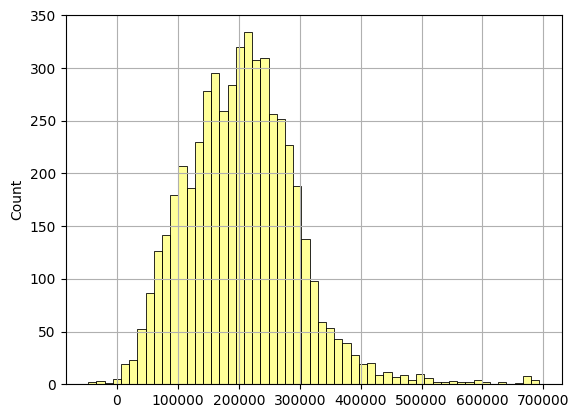

In [230]:
sns.histplot(data=test_preds,color="yellow",alpha=0.4)
plt.grid()

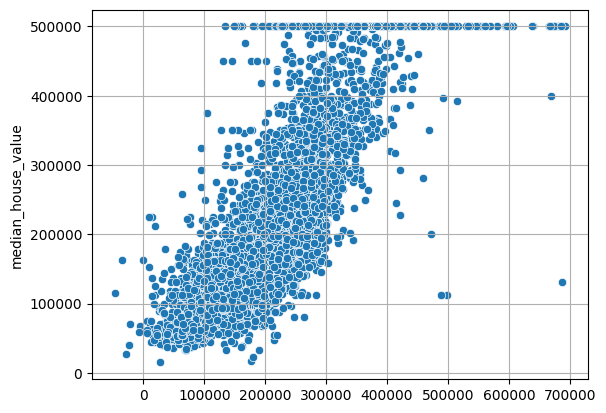

In [231]:
sns.scatterplot(x=test_preds,y=y_test)
plt.grid()

In [232]:

test_residual= test_preds-y_test

<Axes: xlabel='median_house_value', ylabel='Count'>

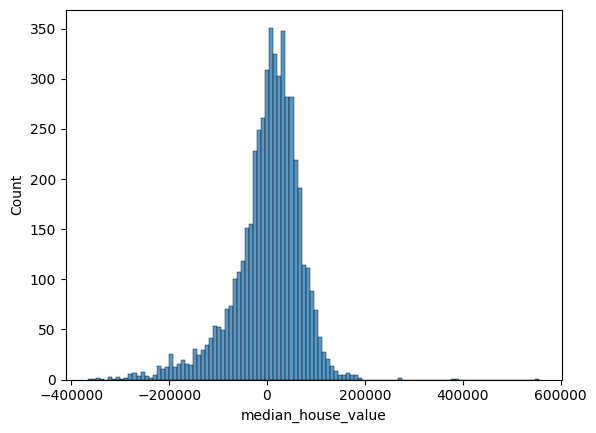

In [233]:
sns.histplot(data=test_residual)

In [234]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [235]:
print("the train data")
print(f"mean_absolute_error : {mean_absolute_error(y_pred=test_preds,y_true=y_test)}")
print(f"mean_squared_error : {mean_squared_error(y_pred=test_preds,y_true=y_test)}")
print(f"root_mean_squared_error : {root_mean_squared_error(y_pred=test_preds,y_true=y_test)}")
print(f"r^2 score:{r2_score(y_pred=test_preds,y_true=y_test)}")

the train data
mean_absolute_error : 50601.36075699129
mean_squared_error : 4886215734.114971
root_mean_squared_error : 69901.4716162326
r^2 score:0.626686241701436


In [236]:
#lasso
from sklearn.linear_model import Lasso

In [241]:
def evaluation_maker(y_actual, y_predicted):
  print(f"Mean Absolute error (MAE): {round(mean_absolute_error(y_true = y_actual, y_pred = y_predicted))}")
  print(f"Root Mean Squared error (RMSE): {round(root_mean_squared_error(y_true = y_actual, y_pred = y_predicted))}")
  print(f"R^2 score: {round(r2_score(y_true = y_actual, y_pred = y_predicted), 4)}")
  

In [244]:
alpha_list=[0.5,1,2,5,10,50,100,500]
for i in alpha_list:
    model=Lasso(alpha=i,max_iter=5000)
    model.fit(x_train_dummies,y_train)
    training_preds=model.predict(x_train_dummies)
    testing_preds=model.predict(x_test_dummies)
    print(f"\n\n\nFor alpha = {i}, the TRAINING set:")
    evaluation_maker(y_train, training_preds)
    print(f"\n******** the TESTING set: ********")
    evaluation_maker(y_test,test_preds)





For alpha = 0.5, the TRAINING set:
Mean Absolute error (MAE): 49630
Root Mean Squared error (RMSE): 68324
R^2 score: 0.6513

******** the TESTING set: ********
Mean Absolute error (MAE): 50601
Root Mean Squared error (RMSE): 69901
R^2 score: 0.6267



For alpha = 1, the TRAINING set:
Mean Absolute error (MAE): 49630
Root Mean Squared error (RMSE): 68324
R^2 score: 0.6513

******** the TESTING set: ********
Mean Absolute error (MAE): 50601
Root Mean Squared error (RMSE): 69901
R^2 score: 0.6267



For alpha = 2, the TRAINING set:
Mean Absolute error (MAE): 49631
Root Mean Squared error (RMSE): 68324
R^2 score: 0.6513

******** the TESTING set: ********
Mean Absolute error (MAE): 50601
Root Mean Squared error (RMSE): 69901
R^2 score: 0.6267



For alpha = 5, the TRAINING set:
Mean Absolute error (MAE): 49633
Root Mean Squared error (RMSE): 68325
R^2 score: 0.6513

******** the TESTING set: ********
Mean Absolute error (MAE): 50601
Root Mean Squared error (RMSE): 69901
R^2 score: 0.626